<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/graviationalwave_GW170814.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Graviational Wave GW170814 (Aug 2017)**

Gravitational wave event GW170814 as detected by LIGO detectors at Hanford and Livingston, and the Virgo detector

https://de.m.wikipedia.org/wiki/GW170814

In [ ]:
# gwpy and h5py for LIGOs HDF5 data
!pip install h5py gwpy ja gwosc PyWavelets matplotlib -q
import numpy as np
from gwpy.timeseries import TimeSeries
from gwosc import datasets # gwosc provides access to all detected events
from gwpy.plot import Plot
import matplotlib.pyplot as plt
import h5py

**Load and select data**

In [ ]:
# List all available events of gravitational waves
events = datasets.find_datasets(type="event")
print(f"Available events: {events}")

Available events: ['151008-v1', '151012.2-v1', '151116-v1', '161202-v1', '161217-v1', '170208-v1', '170219-v1', '170405-v1', '170412-v1', '170423-v1', '170616-v1', '170630-v1', '170705-v1', '170720-v1', '190924_232654-v1', '191118_212859-v1', '191223_014159-v1', '191225_215715-v1', '200114_020818-v1', '200121_031748-v1', '200201_203549-v1', '200214_224526-v1', '200214_224526-v2', '200219_201407-v1', '200311_103121-v1', 'GRB051103-v1', 'GW150914-v1', 'GW150914-v2', 'GW150914-v3', 'GW151012-v1', 'GW151012-v2', 'GW151012-v3', 'GW151226-v1', 'GW151226-v2', 'GW170104-v1', 'GW170104-v2', 'GW170608-v1', 'GW170608-v2', 'GW170608-v3', 'GW170729-v1', 'GW170809-v1', 'GW170814-v1', 'GW170814-v2', 'GW170814-v3', 'GW170817-v1', 'GW170817-v2', 'GW170817-v3', 'GW170818-v1', 'GW170823-v1', 'GW190403_051519-v1', 'GW190408_181802-v1', 'GW190408_181802-v2', 'GW190412-v1', 'GW190412-v2', 'GW190412-v3', 'GW190412_053044-v4', 'GW190413_052954-v1', 'GW190413_052954-v2', 'GW190413_134308-v1', 'GW190413_134308-

For example see [Marginal candidates from "GWTC-1](https://gwosc.org/eventapi/html/GWTC-1-marginal/)

In [ ]:
# Select one gravitational event
#event = 'GW170608' #; time = 1180922494.5
event = 'GW170814' #; time = 1186741861.5
#event = 'GW150914' #; time = 1126259462

In [ ]:
# Get GPS time for a specific event (from gwosc import datasets)
time = datasets.event_gps(event)
print(f"GPS Time for {event}: {time}")

GPS Time for GW170814: 1186741861.5


In [ ]:
# Alternative data loading methods

# Load data manually from github or science website
# !wget https://raw.githubusercontent.com/deltorobarba/astrophysics/master/hanford_GW170814.hdf5
# !wget https://www.gw-openscience.org/s/events/GW150914/H-H1_LOSC_4_V2-1126259446-32.hdf5

# Load data from gwpy.timeseries
# h1_data = TimeSeries.fetch_open_data('H1', time - 16, time + 16, cache=True)
# l1_data = TimeSeries.fetch_open_data('L1', time - 16, time + 16, cache=True)

**Inspect data**

In [ ]:
# Fetch LIGO data for gravitational wave event from gwosc import datasets
def load_ligo_data(event=event, detector='H1', duration=32):
    # Start time of the event (GPS timestamp)
    event_time = time  # event time in GPS seconds

    # Fetch the strain data around event
    start_time = event_time - duration // 2
    end_time = event_time + duration // 2

    # Fetch strain data for a specific detector (H1 or L1)
    data = TimeSeries.fetch_open_data(detector, start_time, end_time, cache=True)
    return data

# Load strain data for Hanford (H1) and Livingston (L1) detectors
h1_data = load_ligo_data(event=event, detector='H1')
l1_data = load_ligo_data(event=event, detector='L1')

print("Hanford Data (H1):", h1_data)
print("Livingston Data (L1):", l1_data)

Hanford Data (H1): TimeSeries([-6.05177267e-19, -6.16776540e-19, -5.87414291e-19,
            ..., -2.93136331e-19, -3.21124083e-19,
            -3.47147869e-19]
           unit: dimensionless,
           t0: 1186741845.5 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)
Livingston Data (L1): TimeSeries([-3.82385394e-20, -4.52647181e-20, -4.68584241e-20,
            ..., -4.47234710e-20, -5.31718119e-20,
            -4.20968579e-20]
           unit: dimensionless,
           t0: 1186741845.5 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


In [ ]:
h1_data

<TimeSeries([-6.05177267e-19, -6.16776540e-19, -5.87414291e-19,
             ..., -2.93136331e-19, -3.21124083e-19,
             -3.47147869e-19]
            unit=Unit(dimensionless),
            t0=<Quantity 1.18674185e+09 s>,
            dt=<Quantity 0.00024414 s>,
            name='Strain',
            channel=None)>

In [ ]:
l1_data

<TimeSeries([-3.82385394e-20, -4.52647181e-20, -4.68584241e-20,
             ..., -4.47234710e-20, -5.31718119e-20,
             -4.20968579e-20]
            unit=Unit(dimensionless),
            t0=<Quantity 1.18674185e+09 s>,
            dt=<Quantity 0.00024414 s>,
            name='Strain',
            channel=None)>

In [ ]:
print(f"Number of Records: {h1_data.size} for Hanford Data (H1)")
print(f"Number of Records: {l1_data.size} for Livingston Data (L1)")

Number of Records: 131072 for Hanford Data (H1)
Number of Records: 131072 for Livingston Data (L1)


In [ ]:
print("Hanford Data Summary:")
print(f"Start Time: {h1_data.times.value[0]} GPS seconds")
print(f"End Time: {h1_data.times.value[-1]} GPS seconds")
print(f"Sampling Rate: {h1_data.sample_rate} Hz")
print(f"Duration: {h1_data.duration.value} seconds")
print(f"Number of Records: {len(h1_data)}")

print("\nLivingston Data Summary:")
print(f"Start Time: {l1_data.times.value[0]} GPS seconds")
print(f"End Time: {l1_data.times.value[-1]} GPS seconds")
print(f"Sampling Rate: {l1_data.sample_rate} Hz")
print(f"Duration: {l1_data.duration.value} seconds")
print(f"Number of Records: {len(l1_data)}")

Hanford Data Summary:
Start Time: 1186741845.5 GPS seconds
End Time: 1186741877.4997559 GPS seconds
Sampling Rate: 4096.0 Hz Hz
Duration: 32.0 seconds
Number of Records: 131072

Livingston Data Summary:
Start Time: 1186741845.5 GPS seconds
End Time: 1186741877.4997559 GPS seconds
Sampling Rate: 4096.0 Hz Hz
Duration: 32.0 seconds
Number of Records: 131072


**Visualize and preprocess data**

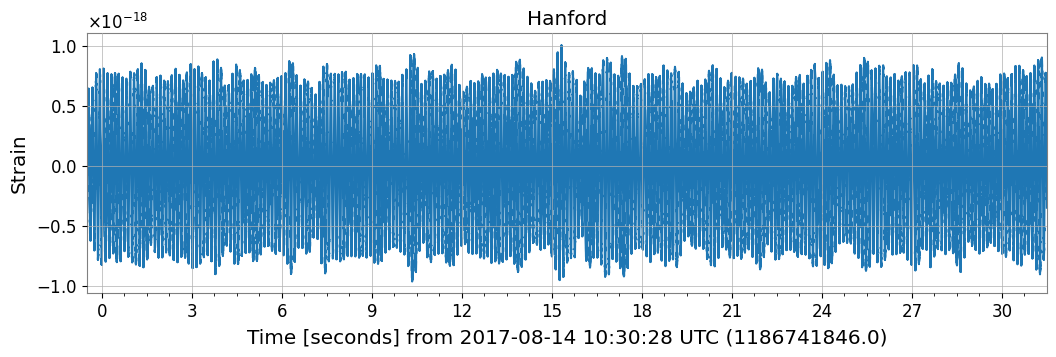

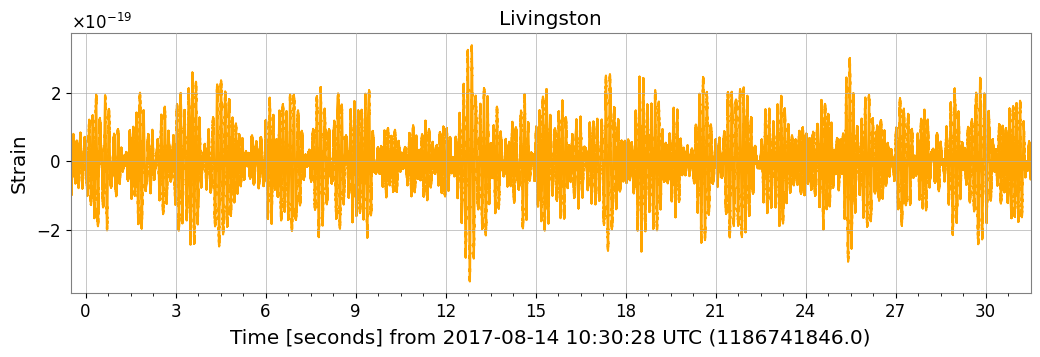

In [ ]:
# Plot raw strain data for Hanford (H1) and Livingston (L1)
plot_h1a = h1_data.plot(title='Hanford')
plt.ylabel("Strain")
plt.show()

plot_l1a = l1_data.plot(title='Livingston', color='orange')
plt.ylabel("Strain")
plt.show()

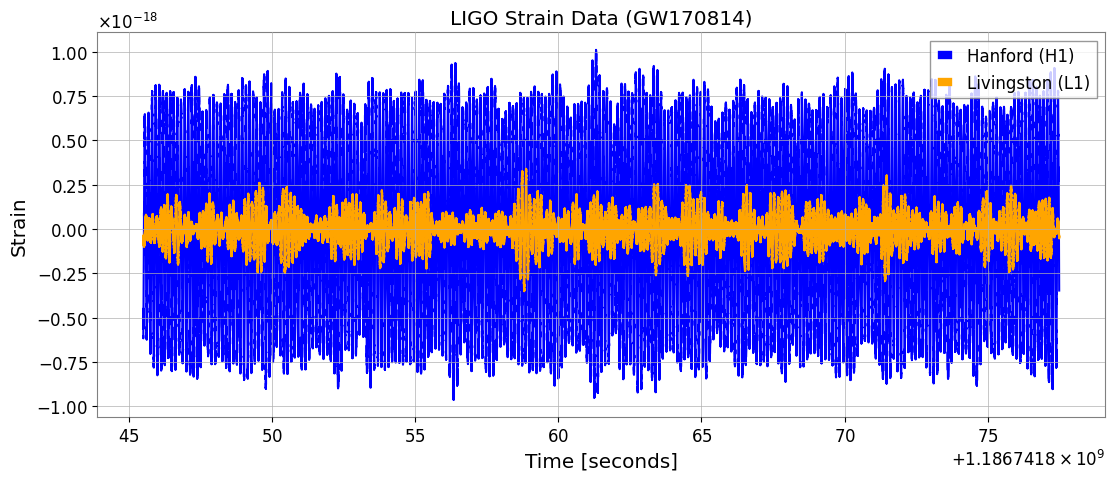

In [ ]:
# Produce overlay visualisation
# Simple: plot = Plot(h1_data, l1_data, title=f"LIGO Strain Data ({event})")
plt.figure(figsize=(13, 5))
plt.plot(h1_data, label="Hanford (H1)", color="blue")
plt.plot(l1_data, label="Livingston (L1)", color="orange")
plt.title(f"LIGO Strain Data ({event})")
plt.legend()
plt.xlabel("Time [seconds]")
plt.ylabel("Strain")
plt.show()

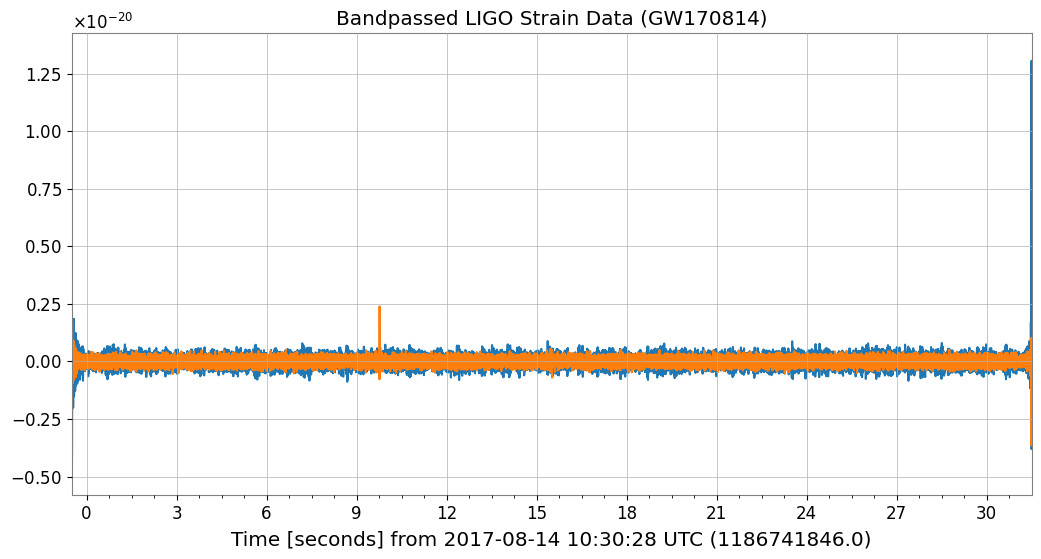

In [ ]:
# Apply a bandpass filter between 30 Hz and 300 Hz (Gravitational wave signals)
h1_data_bp = h1_data.bandpass(30, 400)
l1_data_bp = l1_data.bandpass(30, 400)
plot = Plot(h1_data_bp, l1_data_bp, title=f"Bandpassed LIGO Strain Data ({event})")
plot.show()

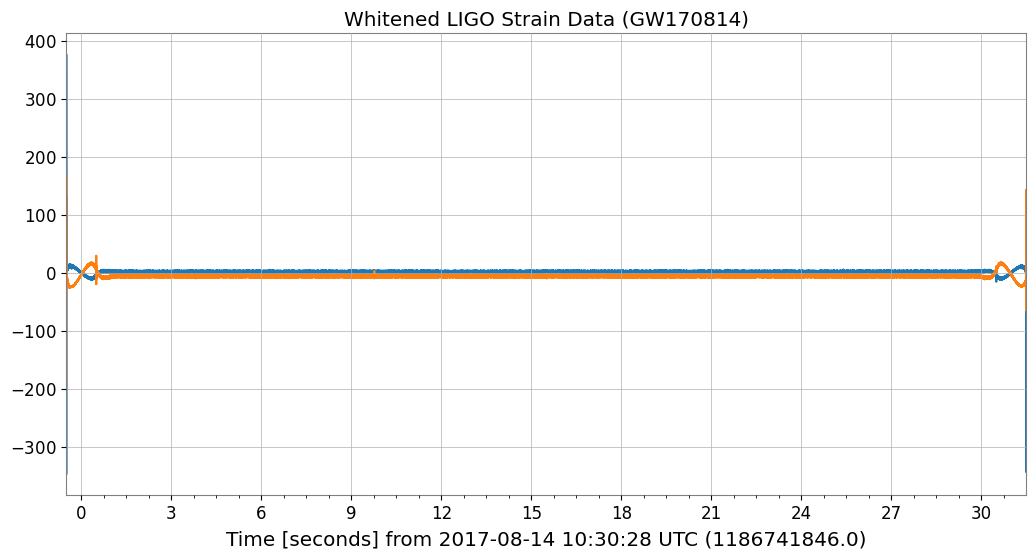

In [ ]:
# Apply whitening to strain data. Makes noise spectrum flat across frequencies. Enhances gravitational wave signal
# (Lower frequencies may be dominated by seismic noise, higher frequencies can be influenced by quantum shot noise)
# Whitening divides signal by amplitude spectral density of noise. Results in spectrum where each frequency component has approx. same noise level
h1_data_white = h1_data_bp.whiten()
l1_data_white = l1_data_bp.whiten()
plot = Plot(h1_data_white, l1_data_white, title=f"Whitened LIGO Strain Data ({event})")

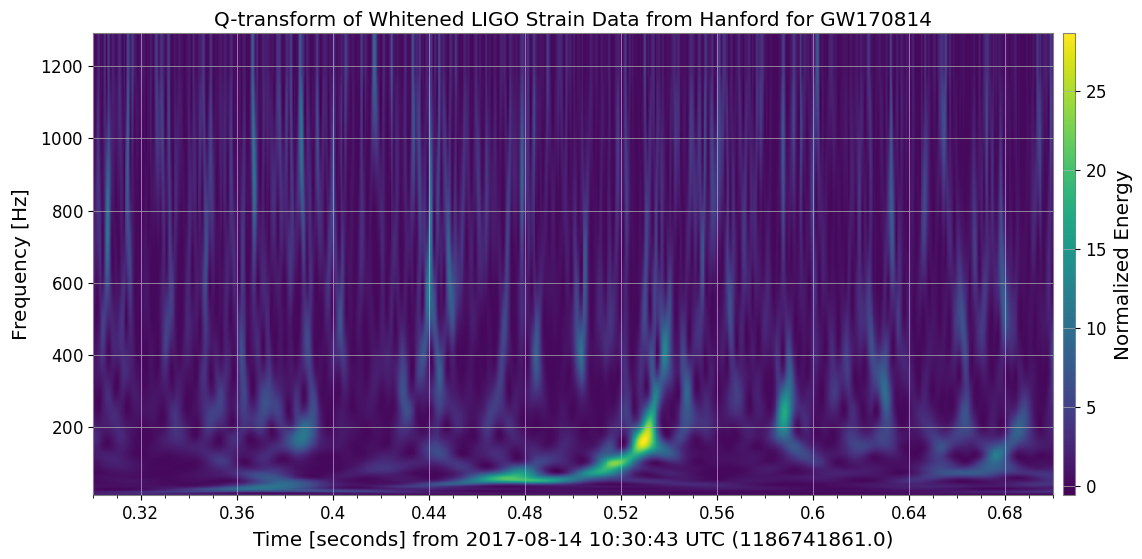

In [ ]:
# Q-transform plot of whitened data (time-frequency representation) for short duration signals
q_transform_h1 = h1_data_white.q_transform(outseg=(time-0.2, time + 0.2))
plot = q_transform_h1.plot()
plot.colorbar(label="Normalized Energy")
plt.gca().set_title(f"Q-transform of Whitened LIGO Strain Data from Hanford for {event}")
plt.show()

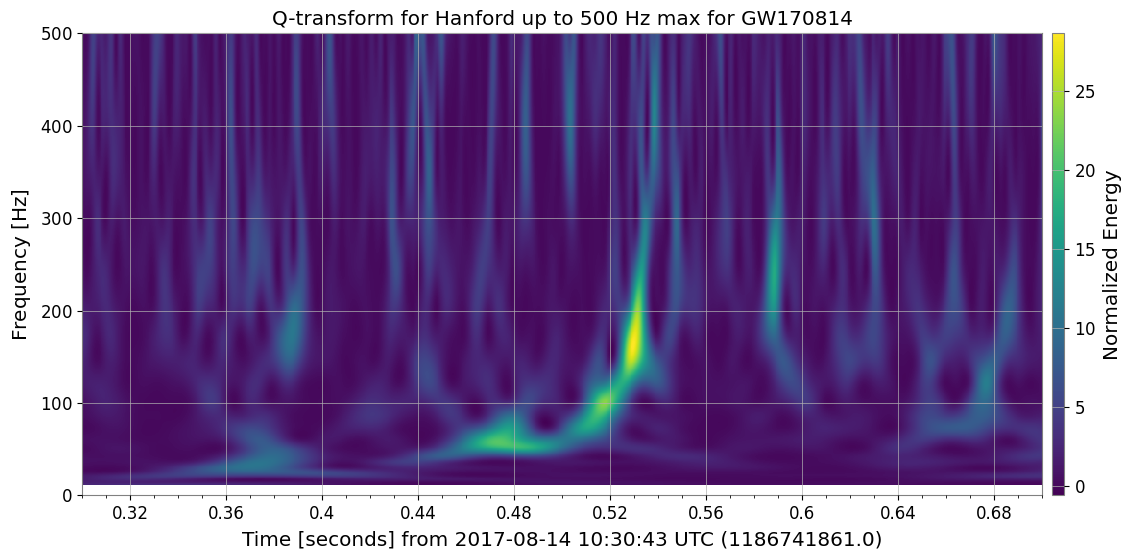

In [ ]:
# Q-transform plot of whitened data (time-frequency representation) for short duration signals
q_transform_h1 = h1_data_white.q_transform(outseg=(time-0.2, time + 0.2))
plot = q_transform_h1.plot()
plot.colorbar(label="Normalized Energy")
plt.gca().set_title(f"Q-transform for Hanford up to 500 Hz max for {event}")
plt.ylim(0, 500)
plt.show()

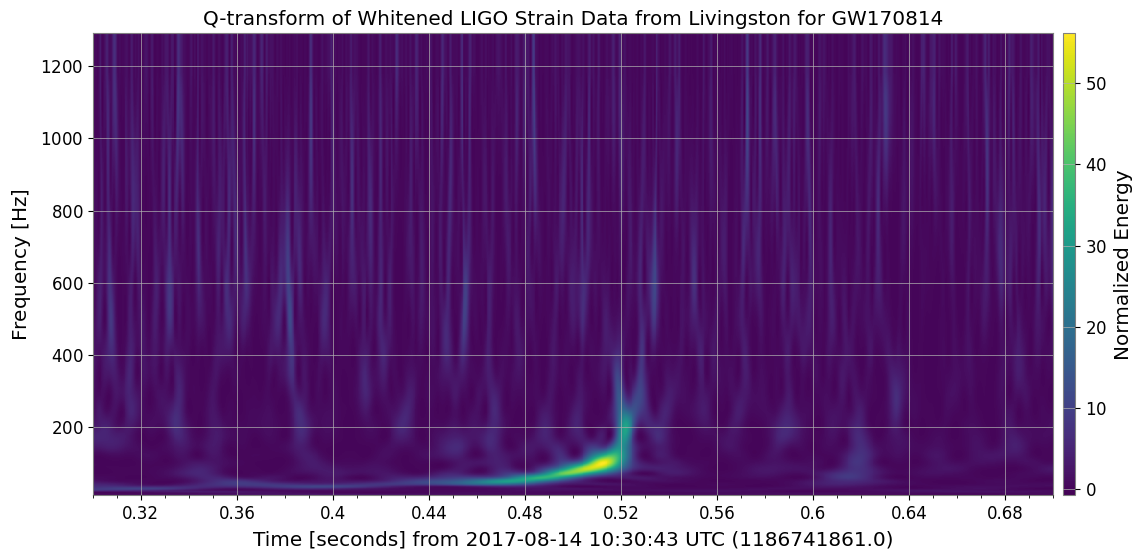

In [ ]:
# Q-transform plot of whitened data (time-frequency representation) for short duration signals
q_transform_l1 = l1_data_white.q_transform(outseg=(time-0.2, time + 0.2))
plot = q_transform_l1.plot()
plot.colorbar(label="Normalized Energy")
plt.gca().set_title(f"Q-transform of Whitened LIGO Strain Data from Livingston for {event}")
plt.show()

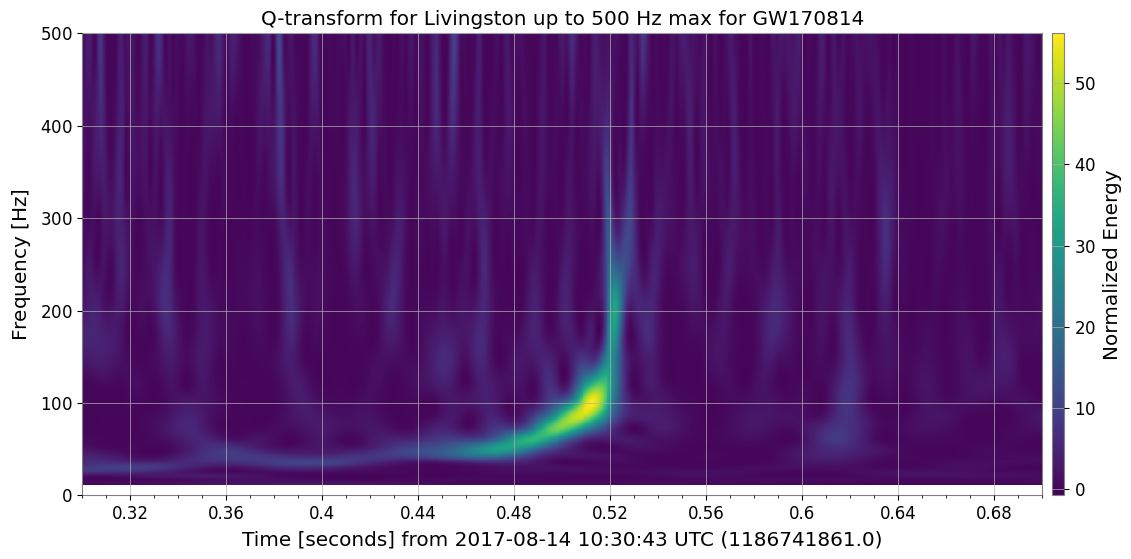

In [ ]:
# Q-transform plot of whitened data (time-frequency representation) for short duration signals
q_transform_l1 = l1_data_white.q_transform(outseg=(time-0.2, time + 0.2))
plot = q_transform_l1.plot()
plot.colorbar(label="Normalized Energy")
plt.gca().set_title(f"Q-transform for Livingston up to 500 Hz max for {event}")
plt.ylim(0, 500)
plt.show()